In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 1.
# Introduction to geospatial data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) Geographic and projected coordinate systems
# (2) Vector and raster data types: basic examples
# (3) Practice with vector data: geometry, attributes, spatial relations 

In [2]:
# Links showing examples for plotting and calculating distances using different methods
#  https://stackoverflow.com/questions/57291951/how-to-calculate-geodesic-distance-along-a-path-lat-lon-points-at-once
#  https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
#  https://www.earthdatascience.org/
#  http://www.naturalearthdata.com/

In [3]:
# Upload libraries

import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import pandas as pd


### Abbiamo due tipologie per rappresentare i dati di tipo geospaziale: dati di tipo vettoriale e dati di tipo raster

### Esempio 1: dati di tipo vettoriale, visualizzare su una mappa le coordinate di 4 punti

In [4]:
# EXAMPLE 1: visualizzare su una mappa le coordinate di 4 punti

# Geographic and projected coordinate systems; vector data type

# Cartopy:
# https://scitools.org.uk/cartopy/docs/latest/index.html

In [5]:
# Store location names and geographic coordinates

# coordinate espresse in termini di latitudine e longitudine, quindi di tipo geografico

# Example: Milano - geographical coordinates from Wikipedia
# sessagesimali : 45° 28′ 1″ N, 9° 11′ 24″ E
# Decimali : 45.466944°, 9.19°
# nome città ; latitudine (gradi N) ; longitudine (gradi E)

cities = ('Madrid \n(Spain)',
          'Beijing \n(China)',
          "Abidjan \n(Cote d'Ivoire)",
          'Bandar Seri Begawan \n(Brunei)')
lats = (40.50,
        39.91,
        5.34,
        4.97 )
lons = (-3.67,
        116.39,
        -4.03,
        114.97 )

print (cities)

('Madrid \n(Spain)', 'Beijing \n(China)', "Abidjan \n(Cote d'Ivoire)", 'Bandar Seri Begawan \n(Brunei)')


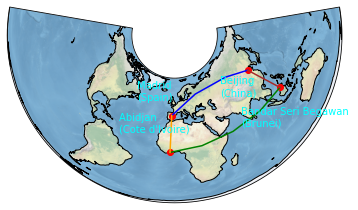

In [6]:
# Play with the code by commenting/uncommenting the lines
# Explore different way of defining the CRS for plotting your data,
#  features of a map, plotting the distance between two points in a map

# Remember: there is a difference between 
# - the CRS in which the data is defined and
# - the CRS used for displaying the data



# It can be easy to get confused about what the projection and transform keyword arguments actually mean. Here we’ll use some simple examples to illustrate the effect of each.
#
# The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.

# The safest thing to do is always provide the transform keyword regardless of the projection you are using, and avoid letting Cartopy make assumptions about your data’s coordinate system. Doing so allows you to choose any map projection for your plot and allow Cartopy to plot your data where it should be


# Define the coordinate system in which the coordinates of your data are given
#   https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/gcs_vs_pcs/

# the CRS in which the data is defined
data_crs = ccrs.Geodetic()         # geographical, lat e long # serve per dire che le mie coordinate sono di tipo geografico, specifico che i miei dati sono specificati con quel sistema di riferimento
#data_crs = ccrs.PlateCarree()      # projected  # oppure potevano essere coordinate di tipo proiettato

# the CRS used for displaying the data
# ora devo scegliere un sistema per visualizzare questi dati, a prescendire dal sistema di riferimento in cui essi sono espressi
# Set a map with a given projection for visualizatin (then play with it)
# vari tipi di proiezione
#myproj = ccrs.PlateCarree()
#myproj = ccrs.Mercator()
#myproj = ccrs.Robinson()
#myproj = ccrs.Mollweide()
myproj = ccrs.AlbersEqualArea()
#myproj = ccrs.NearsidePerspective(central_longitude=50.0, central_latitude=10.0)
ax = plt.axes(projection=myproj)  # è il nostro sfondo

# aggiungiamo il background, linee e immagine per avere colori
# Add some features (you can play a bit)
ax.coastlines()
#ax.gridlines(draw_labels=True)
ax.stock_img()

# su questa base aggiungiamo i nostri elementi
# Add locations on the map
for i in range(0,4):
  plt.plot(lons[i],lats[i],color='r',marker='o',transform=data_crs)

# Add names on the map
for i in range(0,4):
  plt.text(lons[i]-50,lats[i]+5,cities[i],color='cyan',transform=data_crs)


# vengono aggiunti dei segmenti che collegano le varie città
# Plot the distance between couples of cities (shortest or along the same latitude, depending on transform)
plt.plot([lons[0],lons[1]],[lats[0],lats[1]],color='blue',transform=data_crs) # Madrid-Beijing
#plt.plot([lons[0],lons[1]],[lats[0],lats[1]],color='blue') # Madrid-Beijing
plt.plot([lons[2],lons[3]],[lats[2],lats[3]],color='green',transform=data_crs) # Abidjan-Brunei
plt.plot([lons[0],lons[2]],[lats[0],lats[2]],color='orange',transform=data_crs) # Madrid-Abidjan
plt.plot([lons[1],lons[3]],[lats[1],lats[3]],color='brown',transform=data_crs) # Beijing-Brunei

# In case you wanted "smoother" lines:
# https://stackoverflow.com/questions/60685245/plot-fine-grained-geodesic-with-cartopy


# Save the plot by calling plt.savefig() BEFORE plt.show()
#plt.savefig('Module1_plot01.pdf')
plt.show()

### Esempio 2: dati di tipo raster

In [7]:
# EXAMPLE 2: trattiamo in questo secondo esempio l'altra tipolgia di dati
# Raster data type: sono dati grigliati o sottoforma di pixel


# Now let's try to plot raster data
#  Import data from a table
#  You will see it's organized as a 2D table, with first row and column containing the coordinates
#  The elements in the 2D table represent the variable to plot

In [8]:
raster_data = pd.read_csv('./Module1_gridded_data.txt',sep='\t',index_col=0)
raster_data
# ogni riga rappresenta un valore di latitudine, va da -90 a +90
# ogni colonna rappresenta un valore di longitudine, va da -180 a +180

# si va di 10 in 10
# la prima riga va da +80 a +90 indicati con la coordinata centrale centroide +85

,-175,-165,-155,-145,-135,-125,-115,-105,-95,-85,...,85,95,105,115,125,135,145,155,165,175
var(lat/lon),,,,,,,,,,,,,,,,,,,,,
85,-9.55,-23.23,7.23,-1.20,-39.86,-13.38,-25.50,-1.46,-6.96,-8.76,...,13.58,17.90,0.56,10.98,4.78,32.04,9.47,15.05,19.54,35.79
75,-37.01,-5.75,5.08,-28.05,-2.23,-13.49,-26.44,-4.99,-12.51,-5.32,...,12.71,-5.70,7.21,5.99,25.61,14.05,20.61,13.77,7.43,-14.75
65,2.37,-7.87,2.27,-17.66,-10.38,-23.70,-9.78,-14.80,-12.16,-4.75,...,9.88,2.05,19.33,18.01,3.28,9.23,12.92,4.42,-1.08,4.43
55,-20.73,-14.75,-13.45,-6.19,-2.53,-7.23,-16.69,-12.84,-3.81,-5.78,...,7.65,3.72,-7.82,-3.15,19.00,20.96,9.93,18.56,22.57,8.13
45,3.54,-6.32,-23.70,-12.13,-4.32,1.55,-0.98,0.73,-4.14,4.68,...,4.84,7.01,6.84,12.48,3.58,12.80,-3.16,1.92,12.78,-4.39
35,-14.32,-0.81,-13.71,-1.81,-3.03,-15.87,-5.33,-2.84,-0.25,-3.11,...,2.91,-4.22,5.44,3.21,16.42,0.20,13.88,-1.36,-6.53,7.95
25,2.15,-7.02,-2.58,-8.76,-3.41,-7.83,-3.07,-4.15,0.36,-0.62,...,2.29,0.31,0.96,3.14,0.77,5.27,1.20,5.71,7.51,10.75
15,0.07,-2.82,-4.74,-1.14,0.51,-1.04,0.15,-0.76,-0.39,-1.37,...,2.67,0.43,2.43,4.13,0.02,-2.53,-1.12,0.50,-2.45,1.21
5,-0.70,-1.31,0.62,-0.88,-2.26,-1.20,-1.25,0.00,-1.00,-0.45,...,0.37,-0.31,1.03,-1.52,1.23,0.35,2.58,1.00,1.53,1.50


In [9]:
# estraggo le coordinate

# From the column names and index names we can see the grid spacing (10x10 deg.), 
#  and extract longitudes and latitudes
# Remember: latitudes range from -90 to +90 degrees N, and longitudes from -180 to +180 degrees E.
# This means that we are looking at coordinates identifying the grid cell controids

lons = raster_data.columns
lats = raster_data.index

# codice aggiuntivo per sistemare errori libreria
lons = [int(i)+5 for i in lons]
lats = [i-5 for i in lats]

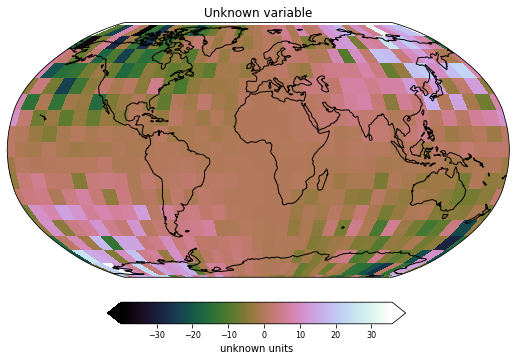

In [10]:
# Set a global map with chosen projection and plot the raster data

# Note on pcolormesh
# pcolormesh fills the grid cells / pixels identified by either grid edges or grid centroids
# Be careful of the way your raster data is organized

# https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html


fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.set_title('Unknown variable')

mm = ax.pcolormesh(lons, lats, raster_data, shading='auto', \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.cubehelix )

# more color palettes here:
#   https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html

ax.coastlines()

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('unknown units') #($\mu g$ $m^{-3}$)
cbar.ax.tick_params(labelsize=8)

plt.savefig('Module1_plot02.pdf')
plt.show()
plt.close()

-10.38


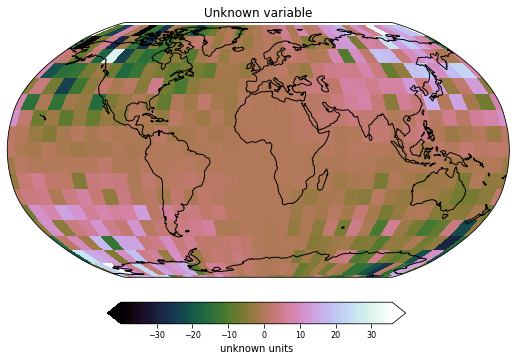

In [11]:
# Check the value the value of the grid cell with lat=65 and lon=-135
#  then change it to 30 (as a check) and re-plot

print(raster_data.loc[65,'-135'])
raster_data.loc[65,'-135']=30

# Re-plot

fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.set_title('Unknown variable')

mm = ax.pcolormesh(lons, lats, raster_data, shading='auto', \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.cubehelix )

ax.coastlines()

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('unknown units') #($\mu g$ $m^{-3}$)
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()